In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read the dataset
dataset = pd.read_csv("diabetes.csv")

In [4]:
# see the column names and its datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# there are 9 columns and 768 rows in the dataset

In [6]:
# Check the first 5 rows of the data
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### There are some values in Insulin, that cannot be zero. So, need to handle them by imputing

In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### There is a huge variation in mean and 50% for Insulin, could be and outlier or missing data.Check for missing values in the datset inference  - Glucose , BP, Skin Thickness,BMI has 0 as min value, which is not possible, hence we can treat this as missingvalues and impute accordingly

In [8]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Let us check the columns that has '0' values in them

In [9]:
features = dataset.columns
cols = (dataset[features] == 0).sum()
print(cols)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


#### It is observed that pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI has 0 value, which cannot be in realtime. hence either we need to handle them, as we cannot delete the rows, because there is very rows in dataset. Hence we need to do the imputation. As Glucose and BMI has very less missing values, we can use mean to replace 0.

In [10]:
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
#dataset.fillna(dataset.median(),inplace = True)
dataset['Glucose'].fillna(dataset['Glucose'].median(), inplace =True)
dataset['BloodPressure'].fillna(dataset['BloodPressure'].median(), inplace =True)
dataset['BMI'].fillna(dataset['BMI'].median(), inplace =True)

In [13]:
# impute Insulin values based on Glucose
by_Glucose_Age_Insulin_Grp = dataset.groupby(['Glucose'])
def fill_Insulin(series):
    return series.fillna(series.median())
dataset['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)

In [14]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                      32
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
dataset['Insulin'] = dataset['Insulin'].fillna(dataset['Insulin'].mean())

In [16]:
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,277.500000,33.6,0.627,50,1
1,1,85.0,66.0,29.0,49.000000,26.6,0.351,31,0
2,8,183.0,64.0,NaN,148.888587,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1
5,5,116.0,74.0,NaN,105.000000,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.000000,31.0,0.248,26,1
7,10,115.0,72.0,NaN,118.000000,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.000000,30.5,0.158,53,1
9,8,125.0,96.0,NaN,121.000000,32.3,0.232,54,1


####  SkinThickness and BMI are havng relation according to type 2 diabetes, hence we can consider imputing the values of skinthickness with respect to BMI and Insulin(optional)

In [18]:
by_BMI_Insulin = dataset.groupby(['BMI'])
def fill_Skinthickness(series):
    return series.fillna(series.mean())
dataset['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

In [19]:
dataset['SkinThickness'].isnull().sum()

32

In [21]:
dataset['SkinThickness'].fillna(dataset['SkinThickness'].mean(),inplace= True)

In [24]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### See the distribution of the outcome variable

In [25]:
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


#### There are 500 non diabetics and 268 diabetics pregnant women. There is imbalance in the data.

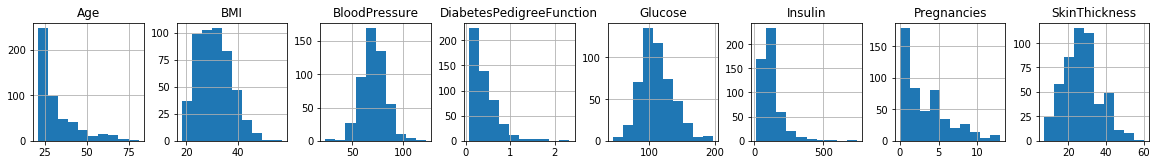

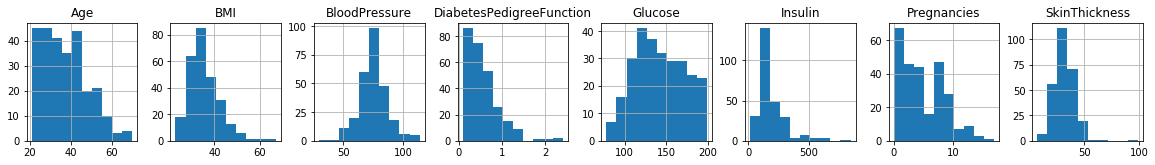

In [87]:
## See the variables with respect to outcome variable

dataset.groupby('Outcome').hist(figsize=(20,5),layout=(2,8),histtype='barstacked')
plt.show()

In [88]:
#### We can find differeces in Age, BMI,Glucose, Insulin,SkinThickness with respect to Outcomes.

In [27]:
correlation = dataset.corr()

In [28]:
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.064381,0.046741,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.188996,0.566640,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.183123,0.125499,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.064381,0.188996,0.183123,1.000000,0.210167,0.636708,0.128380,0.108672,0.232150
Insulin,0.046741,0.566640,0.125499,0.210167,1.000000,0.198895,0.114325,0.185146,0.279690
BMI,0.021559,0.231049,0.281257,0.636708,0.198895,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.128380,0.114325,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.108672,0.185146,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.232150,0.279690,0.312038,0.173844,0.238356,1.000000


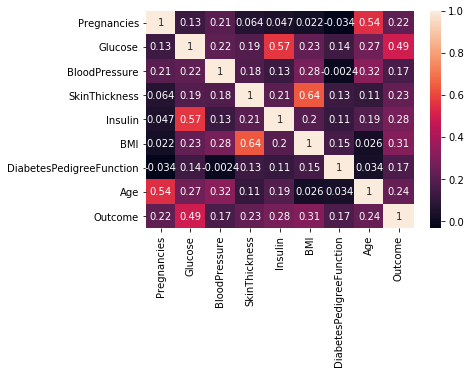

In [29]:
sns.heatmap(correlation,annot = True)

#### graph indicates a Glucose, Insulin, Age, BMI, Skinthickness are having good coorelation factor.

### Univariate Analysis

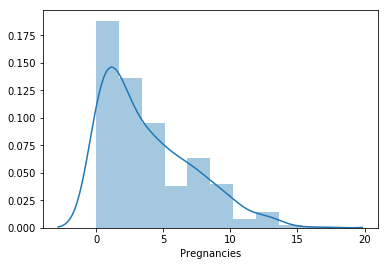

In [30]:
sns.distplot(dataset['Pregnancies'],bins=10)

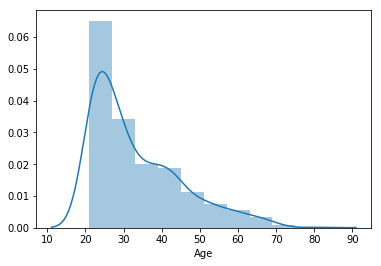

In [31]:
sns.distplot(dataset['Age'],bins=10)

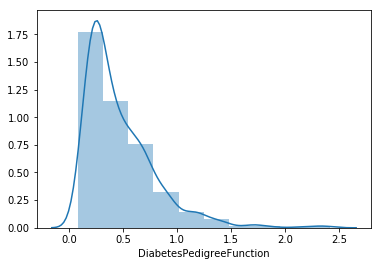

In [32]:
sns.distplot(dataset['DiabetesPedigreeFunction'],bins=10)

##### The distribution of data shows us that the data is mostly right skewed.

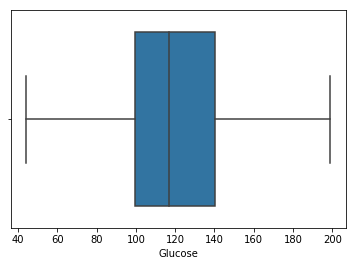

In [33]:
sns.boxplot(dataset['Glucose'])

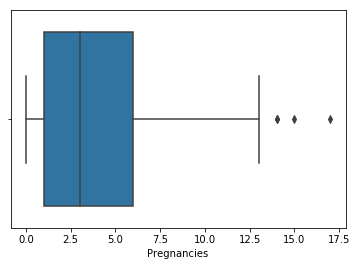

In [34]:
sns.boxplot(dataset['Pregnancies'])

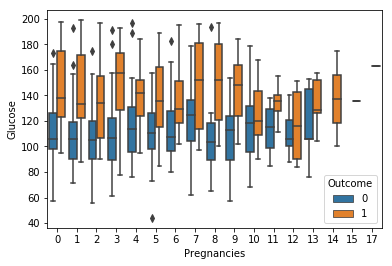

In [35]:
# Find the Glucose level in group of pregnant women who had diabetes.
sns.boxplot(x=dataset['Pregnancies'],y=dataset['Glucose'],hue=dataset['Outcome'])

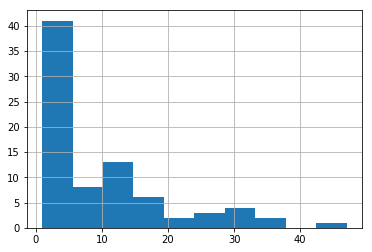

In [36]:
# How many pregnant women had BP?
dataset.groupby(['Outcome','BloodPressure']).Pregnancies.count().hist()
plt.show()

### Bi-Variate Analysis

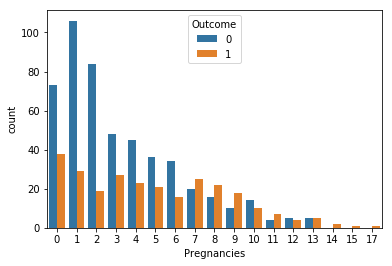

In [37]:
# To find max pregmancy women who were Diabetic
sns.countplot(dataset['Pregnancies'],hue=dataset['Outcome'])

#### pregnent women with 7-9 pregnancies were moslty diagonized as diabetic 

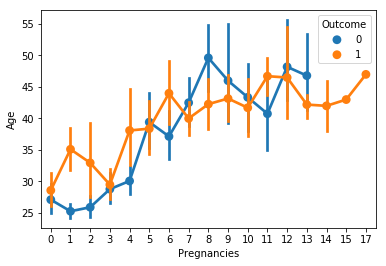

In [38]:
## Does Diabetes in Pregnancy depend on Age?
sns.pointplot(dataset['Pregnancies'],dataset['Age'],hue=dataset['Outcome'])

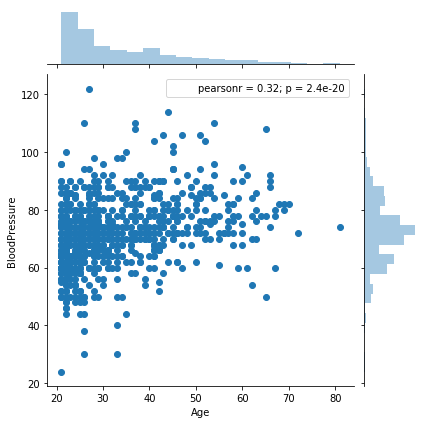

In [39]:
# is BP related to Age?
sns.jointplot('Age','BloodPressure',data=dataset)

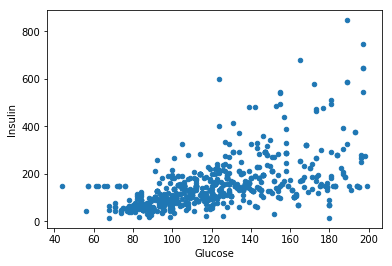

In [40]:
dataset.plot.scatter(x='Glucose', y='Insulin')

#### There is a increasing trend between Insulin and Glucose

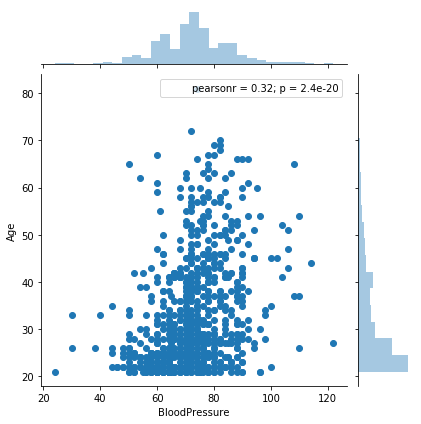

In [41]:
### Is BP related to Age?
sns.jointplot('BloodPressure','Age',data=dataset)

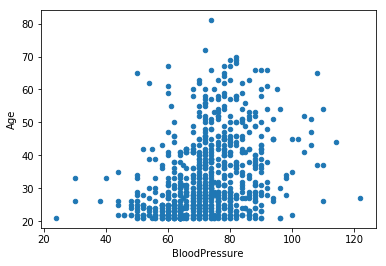

In [42]:
dataset.plot.scatter(x='BloodPressure', y='Age')

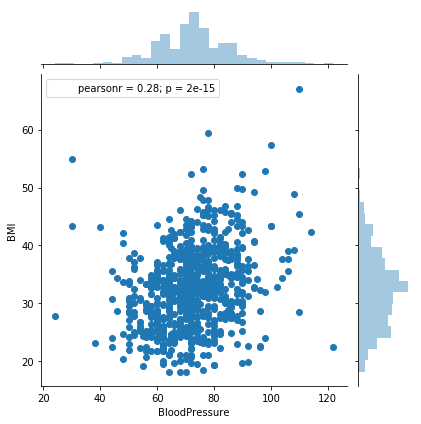

In [43]:
## Is BloodPressure related to BMI?
sns.jointplot(dataset['BloodPressure'],dataset['BMI'])

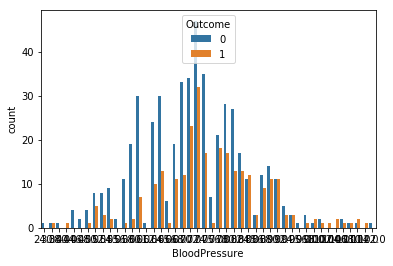

In [44]:
# influence of BloodPressure on Dabetic women
sns.countplot(x='BloodPressure',hue='Outcome',data=dataset)

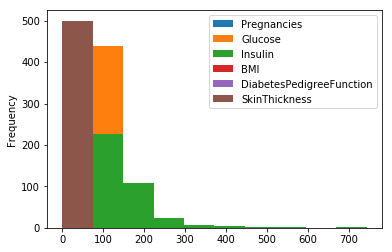

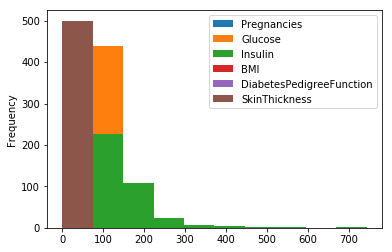

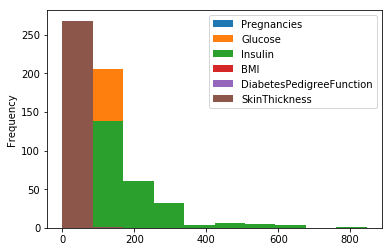

In [90]:
grouped_data=dataset.groupby('Outcome')[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','SkinThickness']].plot.hist()

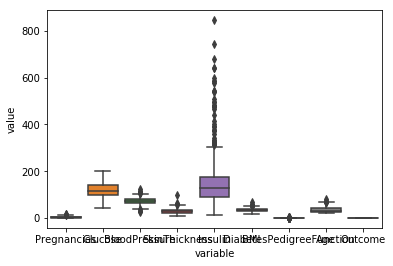

In [46]:
sns.boxplot(x="variable",y="value",data=pd.melt(dataset))

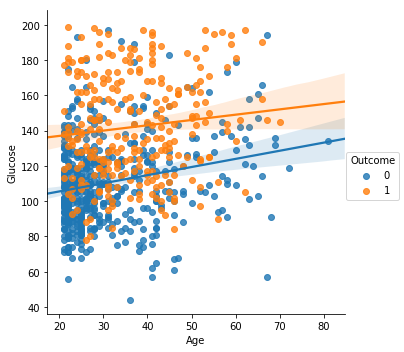

In [47]:
## Find if there is linear relation ship between indpendent variables and outcome
sns.lmplot('Age','Glucose',hue='Outcome',data=dataset)

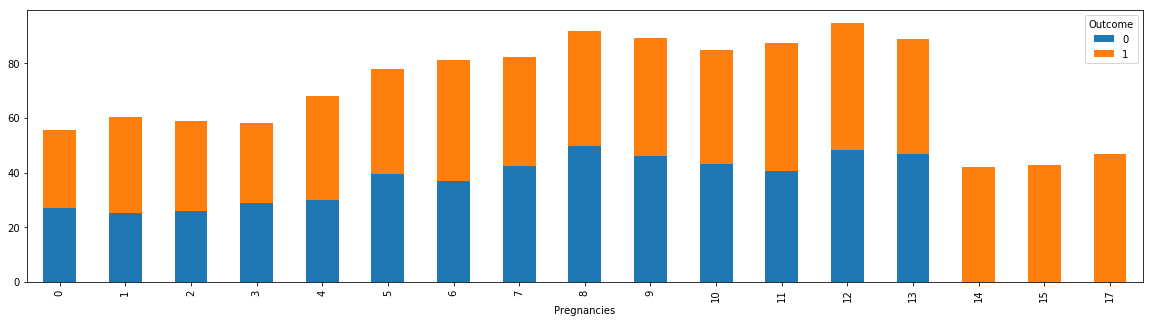

In [48]:
var = dataset.groupby(['Pregnancies','Outcome']).Age.mean()
var.unstack().plot(kind='bar',stacked=True,figsize=(20,5))

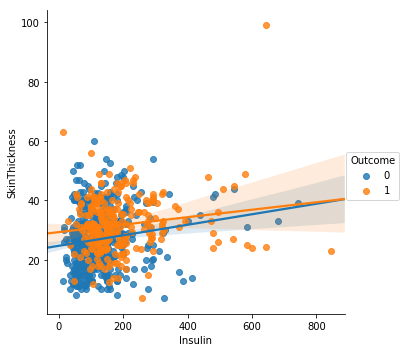

In [51]:
sns.lmplot('Insulin','SkinThickness',hue='Outcome',data=dataset)

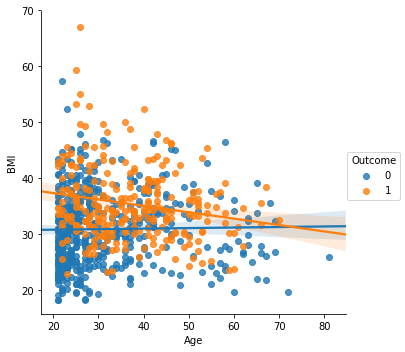

In [50]:
sns.lmplot('Age','BMI',hue='Outcome',data=dataset)

### Inferences